In [1]:
import os
import tensorflow as tf
import numpy as np
import itertools
import matplotlib.pyplot as plt
import gc
from datetime import datetime
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import confusion_matrix

In [2]:
input_label = []
output_label = []
label = []

In [3]:
ficheiro = open("..\\Dataset\\21-02-2018(Time).csv", "r")

ficheiro.readline()
ficheiro.readline()
ficheiro.readline()

countLinha = 0
linha = ficheiro.readline()
while(linha != ""):
#for i in range(10000):
    linha = linha.split(",")
    linha.append(datetime.strptime(linha.pop(len(linha) - 1) + "", '%d/%m/%Y %H:%M:%S\n\n').time())
    label.append(linha)
    countLinha += 1
    linha = ficheiro.readline()
ficheiro.close()

In [4]:
label.sort(key = lambda array : array[len(array) - 1])

In [5]:
print(label[10])

['445.0', '6.0', '276436.0', '3.0', '1.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '14.4698953827', '92145.3333333333', '159133.703734732', '275897.0', '98.0', '276436.0', '138218.0', '194846.101983078', '275995.0', '441.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0', '0', '0', '0', '72.0', '32.0', '10.852421537', '3.6174738457', '0.0', '0.0', '0.0', '0.0', '0.0', '0', '0', '0', '1', '0', '0', '0', '0', '0.0', '0.0', '0.0', '0.0', '0', '0', '0', '0', '0', '0', '3.0', '0.0', '1.0', '0.0', '8192.0', '8192.0', '0.0', '20.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', 'Benign', datetime.time(1, 0, 1)]


In [6]:
for i in range(len(label)):
    label[i].pop(len(label[i]) - 1)

In [7]:
b = 0
a = 0
for i in range(len(label)):
    out = label[i].pop(len(label[i]) - 1)
    if(out == "Benign"):
        out = 0
        b += 1
    else:
        out = 1
        a += 1
    output_label.append(out)
    input_label.append(label[i])

In [8]:
print(str(a) + " " + str(b))

52498 988050


In [9]:
scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(input_label)
input_label = scaler.transform(input_label)

In [10]:
inp = []
out = []
num = 0
for i in range(len(input_label) - 20 + 1):
    aux = []
    for j in range(i, i + 20):
        aux.append(input_label[j])
    inp.append(aux)
    out.append(output_label[i + 20 - 1])
        

In [11]:
inp_train, inp_test, out_train, out_test = train_test_split(inp, out, test_size = 0.2, shuffle = False)

In [13]:
input_labeL = []
output_label = []
inp = []
out = []
gc.collect()

In [12]:
inp_train = np.array(inp_train)
out_train = np.array(out_train)
inp_test = np.array(inp_test)
out_test = np.array(out_test)

In [15]:
print(inp_train.shape)

(832423, 20, 78)


In [16]:
model = keras.Sequential([
    layers.LSTM(units = 128, input_shape = (20, 78), return_sequences = True, use_bias = True),
    layers.LSTM(units = 64, return_sequences = True, use_bias = True),
    layers.LSTM(units = 32, return_sequences = False, use_bias = True),
    layers.Dense(units = 2, activation = "softmax")
])

In [17]:
model.compile(optimizer=keras.optimizers.SGD(learning_rate = 0.08), loss="sparse_categorical_crossentropy", metrics=['accuracy'])

In [18]:
train = model.fit(x = inp_train, y = out_train, validation_split = 0.1, epochs= 10, verbose = 1)

Epoch 1/10
23412/23412 [==============================] - 647s 25ms/step - loss: 0.0317 - accuracy: 0.9924 - val_loss: 0.1672 - val_accuracy: 0.9606
Epoch 2/10
23412/23412 [==============================] - 537s 23ms/step - loss: 0.0025 - accuracy: 0.9992 - val_loss: 0.0643 - val_accuracy: 0.9797
Epoch 3/10
23412/23412 [==============================] - 502s 21ms/step - loss: 8.4175e-04 - accuracy: 0.9997 - val_loss: 0.0668 - val_accuracy: 0.9836
Epoch 4/10
23412/23412 [==============================] - 493s 21ms/step - loss: 4.7207e-04 - accuracy: 0.9999 - val_loss: 0.0544 - val_accuracy: 0.9867
Epoch 5/10
23412/23412 [==============================] - 501s 21ms/step - loss: 4.3462e-04 - accuracy: 0.9999 - val_loss: 0.1215 - val_accuracy: 0.9829
Epoch 6/10
23412/23412 [==============================] - 497s 21ms/step - loss: 4.0163e-04 - accuracy: 0.9999 - val_loss: 0.0555 - val_accuracy: 0.9861
Epoch 7/10
23412/23412 [==============================] - 498s 21ms/step - loss: 0.0013 - 

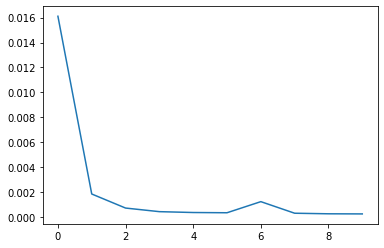

In [19]:
plt.plot(train.history["loss"])
plt.show()

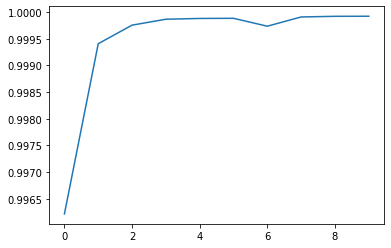

In [20]:
plt.plot(train.history["accuracy"])
plt.show()

In [21]:
model.save("LSTMDosNET(15-02-2018)V2.h5")

In [22]:
res = [np.argmax(resu) for resu in model.predict(inp_test)]

In [23]:
cm = confusion_matrix(y_true = out_test.reshape(len(out_test)), y_pred = np.array(res))

In [24]:
def plot_confusion_matrix(cm, classes, normaliza = False, title = "Confusion matrix", cmap = plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normaliza:
        cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion matrix, without normalization")
    
    print(cm)
    
    thresh = cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
        horizontalalignment="center",
        color="white" if cm[i,j] > thresh else "black")
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[201347      7]
 [  2013   4739]]


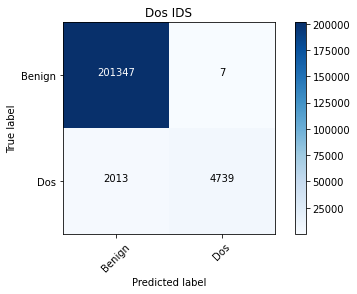

In [25]:
labels = ["Benign", "Dos"]
plot_confusion_matrix(cm = cm, classes = labels, title = "Dos IDS")